# Will it be an early Spring?

On February 2<sup>nd</sup> every year Punxsutawney Phil makes a prediction about if there will be an early Spring or if Winter will continue for 6 more weeks (till about mid-March). He is however not very accurate (well, according to [The Inner Circle](https://www.groundhog.org/inner-circle) he is 100% correct but the human handler may not interpret his response correctly). The overall goal is to be able to predict if it will be an early Spring.

For this project you must go through most steps in the checklist. You must write responses for all items however sometimes the item will simply be "does not apply". Some of the parts are a bit more nebulous and you simply show that you have done things in general (and the order doesn't really matter). Keep your progress and thoughts organized in this document and use formatting as appropriate (using markdown to add headers and sub-headers for each major part). Do not do the final part (launching the product) and your presentation will be done as information written in this document in a dedicated section, no slides or anything like that. It should however include the best summary plots/graphics/data points.

You are intentionally given very little information thus far. You must communicate with your client (me) for additional information as necessary. But also make sure that your communications are efficient, thought out, and not redundant as your client might get frustrated and "fire" you (this only applies to getting information from your client, this does not necessary apply to asking for help with the actual project itself).

Each group from 200-level and 300-level sections with the best results on the 10% of the data that I kept for myself will earn +5 extra credit (if multiple groups are close points may be given to multiple groups).

Frame The Problem
----

**1. Define the objective in business terms.**  
    ACME Seed company is trying to understand weather patterns for their new corn seed product. The company needs to guarantee if there will be an early spring based upon the farmers product yield. If weather permitting, the farmers can get 2 full harvests with the ACME corn seeds. Our objective is to understand when there will be an early spring and when there won't be.  
    
**2. How will your solution be used?**  
    If our model can successfully predict if there will be an early spring (before March 15th) the company will be able to send out a guarantee for the seeds making sales flourish.

**3. What are the current solutions/workarounds (if any)?**   
    Current solutions to knowing about early springs are very iffy. Weather is an always changing and hard to calculate thing. We are currently using Farmer's Almanacs, Meterologist Models, and Groundhogs to predict weather trends.  

**4. How should you frame this problem (supervised/unsupervised, online/offline, ...)?**  
    This is going to be a Supervised (Regression Based) problem with a most likely offline system. Supervised because of the historical data being put into our model and Regression based because of the dynamic changing rates of weather patterns. On top of this for the moment we are keeping it to an offline system because of the not needed constant input of new data to update.  

**5. How should performance be measured? Is the performance measure aligned with the business objective?**   
    Based on the ideology that we will be trying to guarantee ACME seeds that there will be an early spring. Performance will be measured by the Recall score of our model because of the True Positive nature that guarantees a result. We will disregard false negatives and say with 100% certainty that True Positives will be the best results for both the Company and the Farmers.  

**6. What would be the minimum performance needed to reach the business objective?**  
    Guaranteed Early Springs with very high certainty. There is a slight tolerance for error in missing a few early springs, but in contrast to that we do not want to inform the company that there will be an early spring if it actually in reality is still winter. No direct miminum performance has been classified but we hold high standards.  

**7. What are comparable problems? Can you reuse experience or tools?**  
    There are instances in other weather machine learning problems that could be useful such as prediciting percipitation patterns, but other than that not too much direct comparisons.  

**8. Is human expertise available?**     
    Humans on their own have almost no ability to be able to predict the weather. there may be Meterologist who know a bit more but prediciting a whole season is not an easy feat.  

**9. How would you solve the problem manually?**  
    This is definetly not a problem that is a good one to try and solve manually. You can really dedicate your life to understanding weather patterns and logging them, but machine learning is the best way to go about this problem.  
    
**10. List the assumptions you (or others) have made so far. Verify assumptions if possible.**  
    One assumption could be that we need to wait at least until the beginning of february every year to make the prediction. We must also assume that march 15th will be the date of guarantee every year.  
    

In [60]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import scipy as sp
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingRegressor, StackingClassifier

from sklearn.metrics import accuracy_score, mean_squared_error

Get the Data
--

**1. List the data you need and how much you need**  
We need data from January 1st to February 2nd. The data needs to be for each day. The data must contain as many features relevant to the weather as possible. We also need to know which years in the past were early springs or not. Our data should go back as far as possible.  

**2. Find and document where you can get that data**  
Done. Provided by an intern.  

**3. Get access authorizations**  
Done.  

**4. Create a workspace (with enough storage space)**  
Done. Visual Studio Code Jupyter Notebooks

**5. Get the data**  
Done.  

**6. Convert the data to a format you can easily manipulate (without changing the data itself)**

In [61]:
def load_weather_data():
    """
    Loads the CSV file which contains our data for weather.
    """
    return pd.read_csv('weather.csv')

In [62]:
def load_phil_data():
    """
    Loads the CSV file which contains our data for phil's predictions.
    """
    return pd.read_csv('phil_pred.csv')

In [63]:
def load_spring_data():
    """
    Loads the CSV file which contains our data for actuality of season.
    """
    return pd.read_csv('early_spring.csv')

In [64]:
def read_temperature_data(filename):
    """
    Reads temperature data from the given file. M values are assumed to be
    missing values (returned as nan). T values are trace values and returned as
    0.0025 inches for precipitation and snowfall and 0.025 inches for snowdepth
    (see https://www.chicagotribune.com/news/weather/ct-wea-asktom-0415-20180413-column.html).
    """
    def convert_precipitation(raw):
        return 0.0025 if raw == 'T' else np.nan if raw == 'M' else pd.to_numeric(raw)
    def convert_depth(raw):
        return 0.025 if raw == 'T' else np.nan if raw == 'M' else pd.to_numeric(raw)
    return pd.read_csv(filename, na_values=['M'], parse_dates=[0],
        converters={
            "precipitation":convert_precipitation,
            "snowfall":convert_precipitation,
            "snowdepth":convert_depth,
        })

In [65]:
weather_data = load_weather_data()
phil_data = load_phil_data()
spring_data = load_spring_data()

**7. Ensure sensitive information is deleted or protected (e.g. anonymized)**   
Not needed.

**8. Check the size and type of data (time series, geographical, ...)**  
weather_data:
We have 7 features, 6 of which are floats. The date feature is a string. There are 2211 entries in total.

phil_data (groundhog's predictions):
There are 2 features. One is an int and the other is a bool. There are 60 entries in total.

spring_data (which years were early spring):
There are 2 features. One is an int and the other is a bool. There are 67 entries in total.


In [66]:
weather_data.info()
weather_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2211 non-null   object 
 1   max_temp       2167 non-null   float64
 2   min_temp       2170 non-null   float64
 3   avg_temp       2160 non-null   float64
 4   precipitation  2208 non-null   float64
 5   snowfall       2198 non-null   float64
 6   snowdepth      2174 non-null   float64
dtypes: float64(6), object(1)
memory usage: 121.0+ KB


,max_temp,min_temp,avg_temp,precipitation,snowfall,snowdepth
count,2167.000000,2170.000000,2160.000000,2208.000000,2198.000000,2174.000000
mean,36.191970,18.410138,27.284028,0.111475,0.463889,2.503059
std,12.252389,12.755078,11.704472,0.228599,1.196003,4.282987
min,-6.000000,-26.000000,-15.000000,0.000000,0.000000,0.000000
25%,28.000000,10.000000,19.375000,0.000000,0.000000,0.000000
50%,36.000000,20.000000,28.000000,0.010000,0.000000,1.000000
75%,44.000000,28.000000,35.125000,0.120000,0.500000,3.000000
max,75.000000,51.000000,60.000000,2.560000,21.000000,30.000000


In [67]:
weather_data['date'].apply(lambda x: type(x) == str).all()

True

In [68]:
phil_data.info()
phil_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   year        60 non-null     int64
 1   prediction  60 non-null     bool 
dtypes: bool(1), int64(1)
memory usage: 668.0 bytes


,year
count,60.000000
mean,1984.266667
std,21.866984
min,1947.000000
25%,1966.750000
50%,1983.500000
75%,2003.250000
max,2021.000000


In [69]:
spring_data.info()
spring_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   year          67 non-null     int64
 1   early_spring  67 non-null     bool 
dtypes: bool(1), int64(1)
memory usage: 731.0 bytes


,year
count,67.000000
mean,1983.059701
std,22.206934
min,1947.000000
25%,1964.500000
50%,1982.000000
75%,2002.500000
max,2021.000000


**9. Sample a test set, put it aside, and never look at it (no data snooping!)**  

In [70]:
#this line is used for converting strings to datetimes
weather_data['date'] = weather_data['date'].astype('datetime64[ns]')

In [71]:
#function that groups date sets of 33 into individual years
def convert_dates_to_year():
    weather_data['year'] = weather_data['date'].dt.year

    days = []
    for year in range(0, 67):
        for day in range (0, 33):
            days.append(day)

    weather_data['day_of_year'] = days

In [72]:
convert_dates_to_year()

In [73]:
weather_data.drop(columns=['date'], inplace=True)

In [74]:
pivot_weather = weather_data.pivot(index='year', columns='day_of_year')
pivot_weather

max_temp                                                        \
day_of_year       0     1     2     3     4     5     6     7     8     9    
year                                                                         
1947            30.0  44.0  54.0  42.0  33.0  33.0  34.0  35.0  31.0  30.0   
1948            46.0  41.0  32.0  34.0  34.0  32.0  32.0  41.0  49.0  33.0   
1949            31.0  34.0  40.0  43.0  55.0  54.0  49.0  56.0  61.0  53.0   
1950            49.0  53.0  61.0  69.0  54.0  53.0  43.0  30.0  48.0  59.0   
1951            40.0  46.0  52.0  50.0  41.0  46.0  36.0  23.0  30.0  46.0   
1952            68.0  52.0  39.0  36.0  39.0  32.0  32.0  35.0  48.0  36.0   
1953            34.0  42.0  42.0  33.0  28.0  28.0  31.0  37.0  42.0  44.0   
1954            42.0  51.0  44.0  32.0  31.0  29.0  30.0  31.0  44.0  45.0   
1955            55.0  49.0   NaN  42.0  43.0  56.0  33.0  40.0  36.0  37.0   
1956            33.0  35.0  38.0  36.0  33.0  53.0  33.0  25.0  22.0  27.0   
1957            31.0  22.0  28.0  39.0  31.0  33.0  32.0  31.0  38.0  39.0   
1958            42.0  22.0  22.0  21.0  25.0  43.0  43.0  25.0  23.0  42.0   
1959            38.0  42.0  46.0  41.0  20.0  18.0  23.0  27.0  20.0  21.0   
1960            42.0  46.0  49.0  31.0  32.0  37.0  41.0  40.0  48.0  48.0   
1961            36.0  32.0  29.0  24.0  40.0  45.0  47.0  43.0  25.0  36.0   
1963            21.0  26.0  33.0  35.0  41.0  36.0  36.0  34.0  45.0  54.0   
1964            31.0  34.0  50.0  46.0  43.0  41.0  40.0  41.0  47.0  43.0   
1965            36.0  53.0  34.0  30.0  44.0  42.0  49.0  59.0  60.0  33.0   
1966            62.0  42.0  43.0  43.0  51.0  43.0  40.0  33.0  30.0  43.0   
1967            42.0  39.0  40.0  37.0  28.0  35.0  49.0  55.0  31.0  35.0   
1968            30.0  28.0  37.0  30.0  13.0  32.0  28.0  10.0  25.0  28.0   
1969            32.0  19.0  30.0  19.0  20.0  28.0  32.0  24.0  42.0  22.0   
1970            29.0  30.0  30.0  20.0  36.0  33.0  24.0  10.0   5.0  17.0   
1971            34.0  35.0  46.0  47.0  46.0  28.0  24.0  20.0  30.0  43.0   
1972            47.0  42.0  46.0  42.0  40.0  27.0  34.0  37.0  47.0  52.0   
1973            56.0  37.0  40.0  52.0  39.0  29.0  19.0  19.0  23.0  21.0   
1974            35.0  28.0  34.0  32.0  34.0  30.0  30.0  25.0  39.0  37.0   
1975            44.0  35.0  37.0  38.0  39.0  40.0  46.0  56.0  47.0  49.0   
1976            38.0  41.0  43.0  28.0  17.0  36.0  41.0  33.0  12.0  21.0   
1977            12.0  22.0  26.0  28.0  31.0  31.0  30.0  22.0  23.0  29.0   
1978            37.0  35.0  20.0  35.0  41.0  40.0  44.0  52.0  50.0   8.0   
1979            56.0  51.0  23.0  21.0  21.0  27.0  35.0  33.0  16.0  20.0   
1980            31.0  30.0  32.0  30.0  29.0  29.0  40.0  31.0  32.0  39.0   
1982            42.0  37.0  39.0  53.0  35.0  47.0  40.0  26.0  26.0   9.0   
1983            40.0  35.0  34.0  38.0  44.0  35.0  48.0  36.0  40.0  43.0   
1984            30.0  34.0  33.0  37.0  35.0  37.0   NaN  37.0  38.0  35.0   
1985            70.0  57.0  33.0  42.0  35.0  35.0  35.0  33.0  22.0  24.0   
1987            35.0  32.0  32.0  32.0  35.0  43.0  39.0  34.0  35.0  38.0   
1988             NaN  26.0  33.0  29.0  16.0  11.0  19.0  25.0  25.0  23.0   
1989            36.0  38.0  36.0  28.0  35.0   NaN  41.0  57.0  38.0  44.0   
1991            40.0  43.0  31.0  31.0  36.0  36.0  33.0  31.0  38.0  35.0   
1992            41.0  48.0  50.0  52.0  49.0  37.0  35.0  45.0  47.0  41.0   
1994            47.0  40.0  34.0  30.0  23.0  30.0  34.0  32.0  18.0  28.0   
1996            38.0  35.0  38.0  20.0  21.0  22.0  17.0  21.0  22.0  24.0   
1997            35.0  51.0  58.0  71.0  64.0  48.0   NaN  29.0  31.0  29.0   
1998            32.0  46.0  56.0  54.0  66.0  57.0  64.0  66.0   NaN  40.0   
1999            20.0  20.0  37.0  21.0  11.0  28.0  30.0  34.0  44.0  20.0   
2000            68.0  64.0  64.0  62.0  36.0  57.0  56.0  45.0  48.0  55.0   
2001             NaN   NaN   NaN  

In [75]:
pivot_weather.columns = ["_".join(str(x) for x in a) for a in pivot_weather.columns.to_flat_index()]

In [76]:
def merge_spring_and_weather_data():
    return pd.merge(pivot_weather, spring_data, on='year', how='inner')

In [77]:
data = merge_spring_and_weather_data()
data

,year,max_temp_0,max_temp_1,max_temp_2,max_temp_3,max_temp_4,max_temp_5,max_temp_6,max_temp_7,max_temp_8,...,snowdepth_24,snowdepth_25,snowdepth_26,snowdepth_27,snowdepth_28,snowdepth_29,snowdepth_30,snowdepth_31,snowdepth_32,early_spring
0,1947,30.0,44.0,54.0,42.0,33.0,33.0,34.0,35.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,True
1,1948,46.0,41.0,32.0,34.0,34.0,32.0,32.0,41.0,49.0,...,10.000,10.000,9.000,9.000,8.000,5.000,5.000,5.000,4.000,False
2,1949,31.0,34.0,40.0,43.0,55.0,54.0,49.0,56.0,61.0,...,0.000,0.000,0.000,0.000,0.025,0.025,2.000,2.000,2.000,True
3,1950,49.0,53.0,61.0,69.0,54.0,53.0,43.0,30.0,48.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,False
4,1951,40.0,46.0,52.0,50.0,41.0,46.0,36.0,23.0,30.0,...,0.025,1.000,1.000,0.025,0.000,0.000,0.025,0.025,0.025,True
5,1952,68.0,52.0,39.0,36.0,39.0,32.0,32.0,35.0,48.0,...,1.000,0.000,0.000,0.025,0.025,0.000,0.000,0.000,0.000,False
6,1953,34.0,42.0,42.0,33.0,28.0,28.0,31.0,37.0,42.0,...,1.000,0.025,0.000,0.025,1.000,0.000,0.000,0.000,0.000,True
7,1954,42.0,51.0,44.0,32.0,31.0,29.0,30.0,31.0,44.0,...,0.000,0.000,0.000,0.025,0.025,0.000,0.000,0.025,0.000,True
8,1955,55.0,49.0,NaN,42.0,43.0,56.0,33.0,40.0,36.0,...,3.000,2.000,4.000,4.000,4.000,4.000,3.000,4.000,6.000,True
9,1956,33.0,35.0,38.0,36.0,33.0,53.0,33.0,25.0,22.0,...,3.000,3.000,3.000,2.000,1.000,0.000,0.025,0.025,1.000,True


In [78]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=250)

Explore the Data
--

**1. Copy the data for exploration, downsampling to a manageable size if necessary.**  
Downsizing not necessary

In [79]:
early_spring_data = data.copy()

**2. Study each attribute and its characteristics: Name; Type (categorical, numerical, 
bounded, text, structured, ...); % of missing values; Noisiness and type of noise (stochastic, outliers, rounding errors, ...); 
Usefulness for the task; Type of distribution (Gaussian, uniform, logarithmic, ...)**  

In [80]:
early_spring_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 66
Data columns (total 200 columns):
 #    Column            Dtype  
---   ------            -----  
 0    year              int64  
 1    max_temp_0        float64
 2    max_temp_1        float64
 3    max_temp_2        float64
 4    max_temp_3        float64
 5    max_temp_4        float64
 6    max_temp_5        float64
 7    max_temp_6        float64
 8    max_temp_7        float64
 9    max_temp_8        float64
 10   max_temp_9        float64
 11   max_temp_10       float64
 12   max_temp_11       float64
 13   max_temp_12       float64
 14   max_temp_13       float64
 15   max_temp_14       float64
 16   max_temp_15       float64
 17   max_temp_16       float64
 18   max_temp_17       float64
 19   max_temp_18       float64
 20   max_temp_19       float64
 21   max_temp_20       float64
 22   max_temp_21       float64
 23   max_temp_22       float64
 24   max_temp_23       float64
 25   max_temp_24       float64


In [81]:
missing_values = early_spring_data.isnull().sum() / len(early_spring_data) * 100

In [93]:
variables = {}
attrs = ['max_temp', 'min_temp', 'avg_temp', 'precipitation', 'snowfall', 'snowdepth']
for i, attr in enumerate(attrs):
    start = 1+(33*i)
    slice = missing_values[start:start+33]
    slice = pd.DataFrame(slice)
    variables[attr] = slice

variables

{'max_temp':                     0
 max_temp_0   2.985075
 max_temp_1   2.985075
 max_temp_2   2.985075
 max_temp_3   1.492537
 max_temp_4   1.492537
 max_temp_5   2.985075
 max_temp_6   4.477612
 max_temp_7   1.492537
 max_temp_8   2.985075
 max_temp_9   1.492537
 max_temp_10  2.985075
 max_temp_11  1.492537
 max_temp_12  1.492537
 max_temp_13  1.492537
 max_temp_14  1.492537
 max_temp_15  1.492537
 max_temp_16  1.492537
 max_temp_17  1.492537
 max_temp_18  2.985075
 max_temp_19  1.492537
 max_temp_20  4.477612
 max_temp_21  1.492537
 max_temp_22  1.492537
 max_temp_23  1.492537
 max_temp_24  1.492537
 max_temp_25  1.492537
 max_temp_26  1.492537
 max_temp_27  1.492537
 max_temp_28  1.492537
 max_temp_29  1.492537
 max_temp_30  1.492537
 max_temp_31  1.492537
 max_temp_32  1.492537,
 'min_temp':                     0
 min_temp_0   2.985075
 min_temp_1   1.492537
 min_temp_2   2.985075
 min_temp_3   1.492537
 min_temp_4   1.492537
 min_temp_5   2.985075
 min_temp_6   1.492537
 min_temp

In [83]:
variables['max_temp'].describe()

,0
count,33.000000
mean,1.990050
std,0.888237
min,1.492537
25%,1.492537
50%,1.492537
75%,2.985075
max,4.477612


In [84]:
variables['min_temp'].describe()

,0
count,33.000000
mean,1.854365
std,0.649543
min,1.492537
25%,1.492537
50%,1.492537
75%,1.492537
max,2.985075


In [95]:
variables['avg_temp'].describe()

,0
count,33.000000
mean,2.306649
std,1.185306
min,1.492537
25%,1.492537
50%,1.492537
75%,2.985075
max,4.477612


In [86]:
variables['precipitation'].describe()

,0
count,33.000000
mean,0.135685
std,0.435727
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.492537


In [87]:
variables['snowfall'].describe()

,0
count,33.000000
mean,0.587969
std,1.176373
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4.477612


In [88]:
variables['snowdepth'].describe()

,0
count,33.000000
mean,1.673451
std,1.223834
min,0.000000
25%,1.492537
50%,1.492537
75%,1.492537
max,4.477612


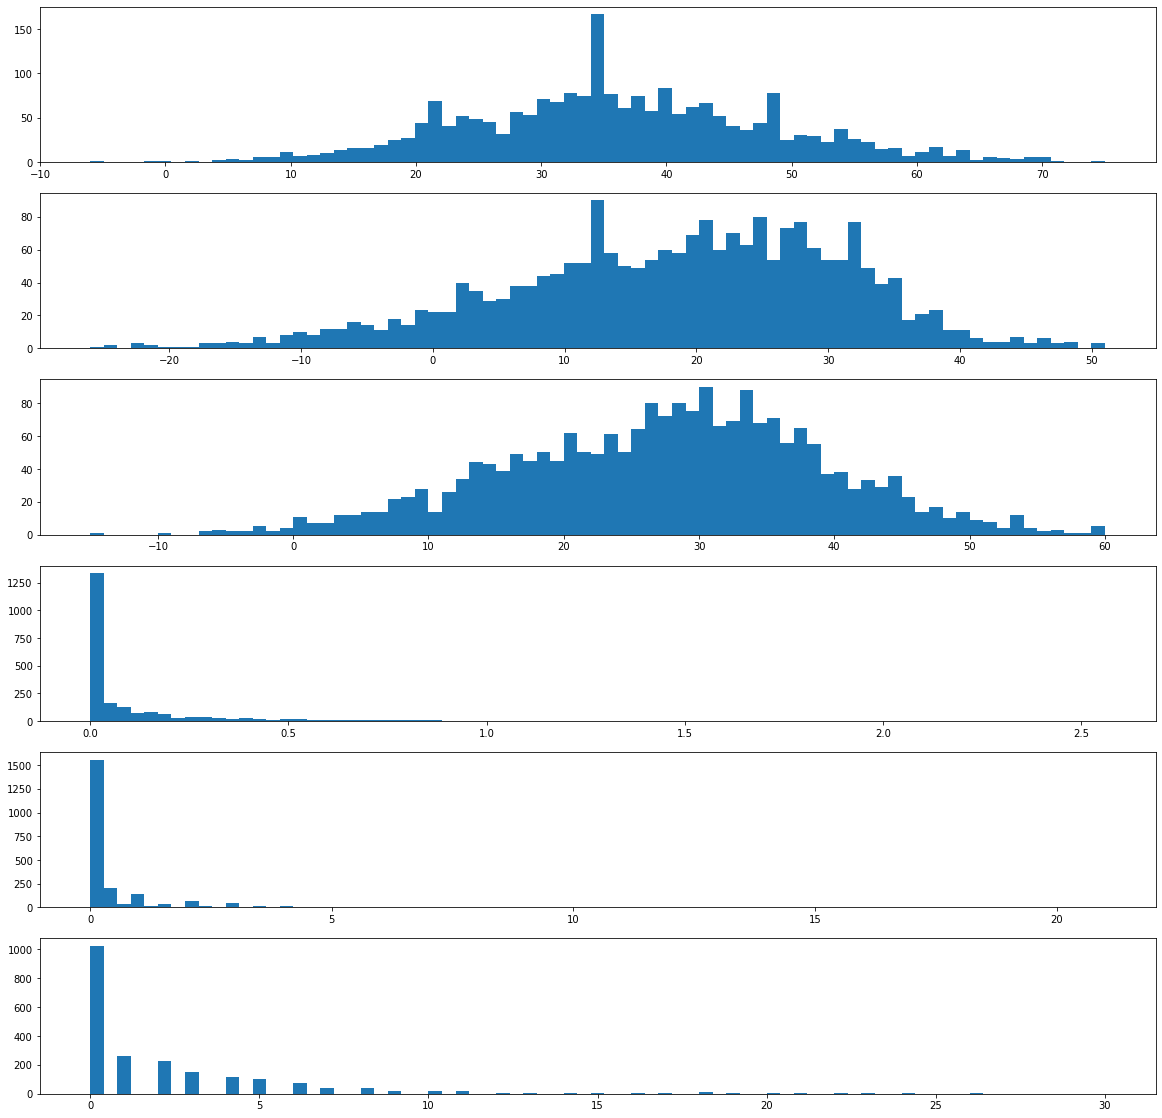

In [99]:
plt.figure(figsize=(20,20))
for i, attr in enumerate(attrs):
    plt.subplot(6, 1, i+1)
    plt.hist(weather_data[attr], bins=75)

Attributes and Characteristics
---
**early_spring** -- Type: Bool, Missing Values: Mean = None, Noise: None

**max_temp** -- Type: Float64, Missing Values: Mean = 1.99, Type of Distribution: Gaussian Distribution, No Skew.

**min_temp** -- Type: Float64, Missing Values: Mean = 1.85, Type of Distribution: Gaussian Distribution, Left Skewed.

**average_temp** -- Type: Float64, Missing Values: Mean = 2.30, Type of Distribution: Gaussian Distribution, Left Skewed.

**percipitation** -- Type: Float64, Missing Values: Mean = 0.13, Type of Distribution: Logarithmic Distribution.

**snowdepth** -- Type: Float64, Missing Values: Mean = 0.58, Type of Distribution: Logarithmic Distribution.

**snowfall** -- Type: Float64, Missing Values: Mean = 1.67, Type of Distribution: Logarithmic Distribution.

**year** -- Type: Int64, Missing Values: Mean = None, Noise: None

**Usefullness for Task** -- Early Spring will be very useful as it is our target attribute that we will base our future reasoning on. To find out coorelations between an early spring and weather pattern we must utilize all of the given features that contain weather events and temperatures. We have the ability to utilize all features within our dataset.

In [89]:
early_spring_data.describe()

,year,max_temp_0,max_temp_1,max_temp_2,max_temp_3,max_temp_4,max_temp_5,max_temp_6,max_temp_7,max_temp_8,...,snowdepth_23,snowdepth_24,snowdepth_25,snowdepth_26,snowdepth_27,snowdepth_28,snowdepth_29,snowdepth_30,snowdepth_31,snowdepth_32
count,67.000000,65.000000,65.000000,65.000000,66.000000,66.000000,65.000000,64.000000,66.000000,65.000000,...,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,65.000000,67.000000
mean,1983.059701,39.246154,38.461538,38.584615,37.515152,36.742424,36.353846,35.281250,34.212121,35.169231,...,3.004545,2.897348,2.882197,3.124621,3.247348,3.276515,3.020076,3.126136,2.975769,2.810821
std,22.206934,12.035145,10.393924,10.892790,12.307899,11.888340,10.936508,10.586707,13.222958,13.019900,...,4.977188,4.362357,4.087015,4.345874,4.526877,4.666509,4.956785,4.984604,4.986580,4.828357
min,1947.000000,12.000000,12.000000,13.000000,13.000000,11.000000,8.000000,8.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1964.500000,32.000000,32.000000,32.000000,30.000000,31.000000,29.000000,30.000000,25.000000,25.000000,...,0.000000,0.025000,0.025000,0.025000,0.025000,0.025000,0.006250,0.006250,0.025000,0.000000
50%,1982.000000,38.000000,38.000000,38.000000,35.000000,36.000000,35.000000,34.500000,33.500000,35.000000,...,1.000000,1.000000,1.500000,1.500000,2.000000,1.500000,1.000000,1.000000,1.000000,1.000000
75%,2002.500000,44.000000,46.000000,46.000000,45.250000,43.000000,43.000000,41.000000,41.000000,45.000000,...,4.000000,3.750000,3.750000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,3.500000
max,2021.000000,70.000000,64.000000,64.000000,71.000000,66.000000,60.000000,64.000000,69.000000,67.000000,...,26.000000,20.000000,21.000000,23.000000,22.000000,24.000000,24.000000,24.000000,24.000000,24.000000


**3. For supervised learning tasks, identify the target attribute(s)**  

**4. Visualize the data**  

**5. Study the correlations between attributes**  

**6. Study how you would solve the problem manually**  

**7. Identify the promising transformations you may want to apply**  

**8. Identify extra data that would be useful (go back to “Get the Data”)**  

**9. Document what you have learned**  
We have 263 rows of data missing.